## 7.5　CNN の実装

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/yuta.shimizu/Downloads/Machine Learning/deep-learning-from-scratch-master/ch07')
sys.path.append(os.pardir)

### 7.5.1　CNN の実装

In [3]:
class SimpleConvNet:
    def __init__(
        self, input_dim=(1, 28, 28),
        conv_param={'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
        hidden_size=100,
        out_size=10,
        weight_init_std=0.01
    ):
        
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        self.layers = OrderDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],self.params['b1'], conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
        self.last_layer = SoftmaxWithLoss()
        
        def predict(self, x):
            for layer in self.layers.values():
                x = layer.forward(x)
            return x
        
        def loss(self, x, t):
            y = self.predict(x)
            return self.last_layer.forward(y, t)
        
        def gradient(self, x, t):
            self.loss(x, t)
            
            dout = 1
            dout = self.last_layer.backward(dout)
            
            layers = list(self.layers.values())
            layers.reverse()
            for layer in layers:
                dout = layer.backward(dout)
                
            grads = {}
            grads['W1'] = self.layers['Conv1'].dW
            grads['b1'] = self.layers['Conv1'].db
            grads['W2'] = self.layers['Affine1'].dW
            grads['b2'] = self.layers['Affine1'].db
            grads['W3'] = self.layers['Affine2'].dW
            grads['b3'] = self.layers['Affine2'].db
            
            return grads

### 7.5.2　CNN の学習

In [4]:
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

train loss:2.2995018992337055
=== epoch:1, train acc:0.23, test acc:0.179 ===
train loss:2.295291231782306
train loss:2.290616283538021
train loss:2.2836367835897273
train loss:2.2774860124217553
train loss:2.264658156765721
train loss:2.2420232319033455
train loss:2.2257162229046448
train loss:2.2107930512101945
train loss:2.1366527912175304
train loss:2.127408486694892
train loss:2.057087708758809
train loss:2.0688045600177465
train loss:2.0297366099253678
train loss:1.9708904038570654
train loss:1.873924361123789
train loss:1.7871700875302545
train loss:1.7684409397428533
train loss:1.6543867554232932
train loss:1.5392893723112724
train loss:1.5280364049789028
train loss:1.5090387370078693
train loss:1.415972733294693
train loss:1.2511161322152728
train loss:1.3988765641957395
train loss:1.156379041993848
train loss:1.117887797727329
train loss:1.049396080047496
train loss:0.9752794124731468
train loss:0.8739412040329292
train loss:0.8947948376998238
train loss:1.0319603576110543
tr

train loss:0.12200291337373505
train loss:0.2756880038438071
train loss:0.11659924146657467
train loss:0.25050717632090885
train loss:0.14459118451173056
train loss:0.2349684345346847
train loss:0.194939613392458
train loss:0.4437852086808144
train loss:0.2250298238307763
train loss:0.17069575243621832
train loss:0.1449846501526704
train loss:0.16361605785624372
train loss:0.12661158415848442
train loss:0.13037123651511562
train loss:0.23800802923511566
train loss:0.22895836648515652
train loss:0.18101739002431352
train loss:0.17917666719100836
train loss:0.2335713786180148
train loss:0.18207578412822323
train loss:0.12990355810023632
train loss:0.11638945447035569
train loss:0.14122092581057033
train loss:0.24089723071831098
train loss:0.1479254585847375
train loss:0.2590240322426583
train loss:0.10524567185828658
train loss:0.24449396083436195
train loss:0.17309236908178127
train loss:0.13816146243544403
train loss:0.1182706554938534
train loss:0.1944872548591324
train loss:0.1123698

train loss:0.1505823017506741
train loss:0.09495162816613244
train loss:0.11988693557383576
train loss:0.04765132596192742
train loss:0.049167901953882646
train loss:0.08061730655639829
train loss:0.05563844997436563
train loss:0.06608634638040316
train loss:0.07633167520826425
train loss:0.06752075309650694
train loss:0.04552061073744469
train loss:0.08241558879133035
train loss:0.06088708870867337
train loss:0.05063502284075899
train loss:0.04129191199738927
train loss:0.04501419509025794
train loss:0.08351693249672237
train loss:0.05427107765823552
train loss:0.1097859015382937
train loss:0.04927913862105207
train loss:0.06504314357248162
train loss:0.08220362196710619
train loss:0.08054341220974401
train loss:0.03733568735544391
train loss:0.06497972245497025
train loss:0.1876353873618756
train loss:0.14366235703129296
train loss:0.07854706400147217
train loss:0.11766326678049577
=== epoch:12, train acc:0.964, test acc:0.936 ===
train loss:0.07687040973489342
train loss:0.085758618

train loss:0.012137142550927415
train loss:0.05832814653229249
train loss:0.05612533729655275
train loss:0.029242092000854578
train loss:0.05080375002147115
train loss:0.031155463145247385
train loss:0.013468440435360475
train loss:0.03556069660454315
train loss:0.045186415503281646
train loss:0.035705197012604814
train loss:0.014935666278199849
train loss:0.0407611810034923
train loss:0.012727142840321797
train loss:0.04182867188650545
train loss:0.04422577076827915
train loss:0.03139474278183691
train loss:0.03344127664775933
train loss:0.016782670978133317
train loss:0.0578609373810523
train loss:0.12338734322534009
train loss:0.1111286849099218
train loss:0.04481082008121966
train loss:0.03041954172406449
=== epoch:17, train acc:0.982, test acc:0.944 ===
train loss:0.03654818328950835
train loss:0.03028379093105247
train loss:0.028163219273442723
train loss:0.031433059210660204
train loss:0.03283495291912375
train loss:0.01927394770647017
train loss:0.06103552434327056
train loss:0

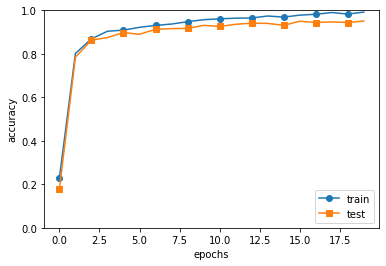

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(
    input_dim=(1, 28, 28),
    conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
    hidden_size=100,
    output_size=10,
    weight_init_std=0.01
)

trainer = Trainer(
    network, x_train, t_train, x_test, t_test, epochs=max_epochs, mini_batch_size=100, optimizer='Adam',
    optimizer_param={'lr': 0.001}, evaluate_sample_num_per_epoch=1000
)

trainer.train()

network.save_params('params.pkl')
print('Save Network Parameters!')

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()